In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '../..'))

from PySDM.physics import si
from PySDM.initialisation.spectral_sampling import ConstantMultiplicity
from PySDM.initialisation.spectra import Exponential, Gaussian
from PySDM.physics.formulae import volume

/home/edejong/.conda/envs/edjPySDM/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


## Constant kernel

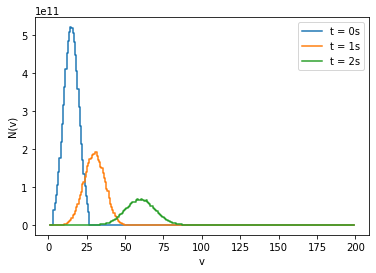

In [2]:
a = 0.01 / si.s

n_sd = 2**17
initial_spectrum = Gaussian(norm_factor=8.39e12, loc=15, scale=5)
attributes = {}
attributes['volume'], attributes['n'] =\
    ConstantMultiplicity(spectrum=initial_spectrum).sample(n_sd)

from PySDM import Builder
from PySDM.environments import Box
from PySDM.dynamics import Coalescence
from PySDM.dynamics.coalescence.kernels import ConstKern
from PySDM.backends import CPU
from PySDM.products.state import ParticlesVolumeSpectrum, ParticlesNumberVolumeSpectrum

builder = Builder(n_sd=n_sd, backend=CPU)
builder.set_environment(Box(dt=1 * si.s, dv=1))
builder.add_dynamic(Coalescence(kernel=ConstKern(kernel_const = a)))
products = [ParticlesVolumeSpectrum(), ParticlesNumberVolumeSpectrum()]
particles = builder.build(attributes, products)

from matplotlib import pyplot
import numpy as np

v_bins_edges = np.linspace((1), (200), num=256)
r_bins_edges = v_bins_edges**(1/3)

for step in [0, 1, 2]:
    particles.run(step - particles.n_steps)
    #pyplot.step(x=r_bins_edges[:-1] ,
    #            y=particles.products['dv/dlnr'].get(r_bins_edges),
    #            where='post', label=f"t = {step}s")
    pyplot.step(x=v_bins_edges[:-1] ,
                y=particles.products['N(v)'].get(v_bins_edges),
                where='post', label=f"t = {step}s")
                
#pyplot.xscale('log')
pyplot.xlabel('v')
pyplot.ylabel("N(v)")
pyplot.legend()

## Golovin Kernel

First set the kernel constant (collisions per second per particle volume) to some number

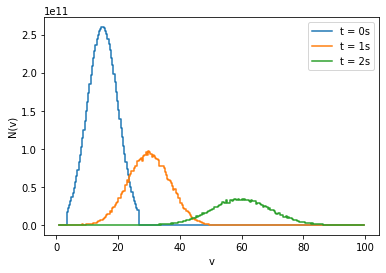

In [5]:
golovin_const = 1e4 / si.s

n_sd = 2**17
initial_spectrum = Gaussian(norm_factor=8.39e12, loc=15, scale=5)
attributes = {}
attributes['volume'], attributes['n'] =\
    ConstantMultiplicity(spectrum=initial_spectrum).sample(n_sd)

from PySDM import Builder
from PySDM.environments import Box
from PySDM.dynamics import Coalescence
from PySDM.dynamics.coalescence.kernels import Golovin
from PySDM.backends import CPU
from PySDM.products.state import ParticlesVolumeSpectrum, ParticlesNumberVolumeSpectrum

builder = Builder(n_sd=n_sd, backend=CPU)
builder.set_environment(Box(dt=1 * si.s, dv=1))
builder.add_dynamic(Coalescence(kernel=Golovin(b = golovin_const)))
products = [ParticlesVolumeSpectrum(), ParticlesNumberVolumeSpectrum()]
particles = builder.build(attributes, products)

from matplotlib import pyplot
import numpy as np

v_bins_edges = np.linspace((1), (100), num=256)
r_bins_edges = v_bins_edges**(1/3)

for step in [0, 1, 2]:
    particles.run(step - particles.n_steps)
    #pyplot.step(x=r_bins_edges[:-1] / si.um,
    #            y=particles.products['dv/dlnr'].get(r_bins_edges),
    #            where='post', label=f"t = {step}s")
    pyplot.step(x=v_bins_edges[:-1],
                y=particles.products['N(v)'].get(v_bins_edges),
                where='post', label=f"t = {step}s")
                
#pyplot.xscale('log')
pyplot.xlabel('v')
pyplot.ylabel("N(v)")
pyplot.legend()

Now try changing the time step
environment(dt=...)

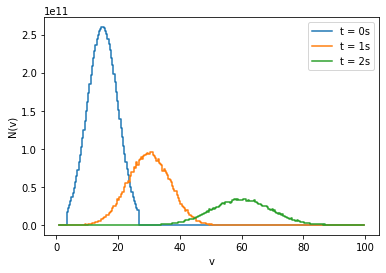

In [7]:
golovin_const = 1e3 / si.s

n_sd = 2**17
initial_spectrum = Gaussian(norm_factor=8.39e12, loc=15, scale=5)
attributes = {}
attributes['volume'], attributes['n'] =\
    ConstantMultiplicity(spectrum=initial_spectrum).sample(n_sd)

from PySDM import Builder
from PySDM.environments import Box
from PySDM.dynamics import Coalescence
from PySDM.dynamics.coalescence.kernels import Golovin
from PySDM.backends import CPU
from PySDM.products.state import ParticlesVolumeSpectrum, ParticlesNumberVolumeSpectrum

builder = Builder(n_sd=n_sd, backend=CPU)
builder.set_environment(Box(dt=0.1 * si.s, dv=1))
builder.add_dynamic(Coalescence(kernel=Golovin(b = golovin_const)))
products = [ParticlesVolumeSpectrum(), ParticlesNumberVolumeSpectrum()]
particles = builder.build(attributes, products)

from matplotlib import pyplot
import numpy as np

v_bins_edges = np.linspace((1), (100), num=256)
r_bins_edges = v_bins_edges**(1/3)

for step in [0, 1, 2]:
    particles.run(step - particles.n_steps)
    #pyplot.step(x=r_bins_edges[:-1] / si.um,
    #            y=particles.products['dv/dlnr'].get(r_bins_edges),
    #            where='post', label=f"t = {step}s")
    pyplot.step(x=v_bins_edges[:-1],
                y=particles.products['N(v)'].get(v_bins_edges),
                where='post', label=f"t = {step}s")
                
#pyplot.xscale('log')
pyplot.xlabel('v')
pyplot.ylabel("N(v)")
pyplot.legend()

Now change the time step and also scale the steps accordingly

8222200037376.0
122518.0


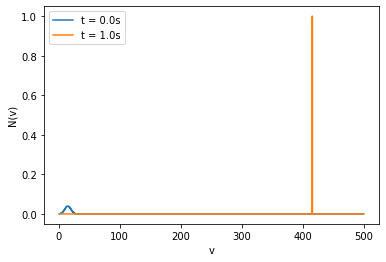

In [8]:
golovin_const = 0.01 / si.s

n_sd = 2**17
initial_spectrum = Gaussian(norm_factor=8.39e12, loc=15, scale=5)
attributes = {}
attributes['volume'], attributes['n'] =\
    ConstantMultiplicity(spectrum=initial_spectrum).sample(n_sd)

from PySDM import Builder
from PySDM.environments import Box
from PySDM.dynamics import Coalescence
from PySDM.dynamics.coalescence.kernels import Golovin
from PySDM.backends import CPU
from PySDM.products.state import ParticlesVolumeSpectrum, ParticlesNumberVolumeSpectrum

builder = Builder(n_sd=n_sd, backend=CPU)
builder.set_environment(Box(dt=0.1 * si.s, dv=1))
builder.add_dynamic(Coalescence(kernel=Golovin(b = golovin_const)))
products = [ParticlesVolumeSpectrum(), ParticlesNumberVolumeSpectrum()]
particles = builder.build(attributes, products)

from matplotlib import pyplot
import numpy as np

v_bins_edges = np.linspace((1), (500), num=1024)
r_bins_edges = v_bins_edges**(1/3)

for step in [0, 10]:
    particles.run(step - particles.n_steps)
    #pyplot.step(x=r_bins_edges[:-1] / si.um,
    #            y=particles.products['dv/dlnr'].get(r_bins_edges),
    #            where='post', label=f"t = {step}s")
    print(sum(particles.products['N(v)'].get(v_bins_edges)))
    pyplot.step(x=v_bins_edges[:-1],
                y=particles.products['N(v)'].get(v_bins_edges)/sum(particles.products['N(v)'].get(v_bins_edges)),
                where='post', label=f"t = {step*0.1}s")
                
#pyplot.xscale('log')
pyplot.xlabel('v')
pyplot.ylabel("N(v)")
pyplot.legend()

## Aha! Now we're getting somewhere